# Food Delivery Orders EDA
**Author:** Jessy Andújar Cruz

**Date:** 2025-05-27

## Introduction

### Project Description
This project aims to perform an exploratory data analysis (EDA) on a food delivery orders dataset. By investigating trends and patterns in customer orders, cuisine preferences, order costs, and delivery performance, the goal is to uncover actionable insights that could help food delivery platforms and restaurants improve their service and operations.

### Objective
The primary objectives of this analysis are:
- To clean and prepare the dataset for analysis by addressing missing values, data types, and outliers.
- To perform descriptive and visual analyses on order characteristics such as cuisine type, cost, preparation, and delivery times.
- To engineer new features that allow for deeper insights, such as identifying late deliveries and evaluating the relationship between food preparation and delivery times.
- To segment orders by cost and satisfaction, helping identify top-selling cuisines, high-value customers, and potential areas for operational improvement.

### Dataset Information
The dataset, obtained from [Kaggle: Food Ordering and Delivery App Dataset](https://www.kaggle.com/datasets/ahsan81/food-ordering-and-delivery-app-dataset), contains 1,898 records of food delivery orders. Each record includes details such as:
- Order and customer IDs
- Restaurant name and cuisine type
- Cost of the order
- Day of the week for the order
- Customer rating
- Food preparation and delivery times

This analysis will provide a foundation for further data-driven strategies in the food delivery sector.

#### Import libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load dataset

In [30]:
raw_data = pd.read_csv('../data/raw/food_order.csv')

In [31]:
df = raw_data.copy() # Create a copy of the raw data

#### Data overview

In [32]:
df.sample(10) # display a random sample of 10 rows from the dataset

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
671,1478217,62161,Tamarind TriBeCa,Indian,6.07,Weekend,4,30,17
413,1476585,141918,S'MAC,American,12.37,Weekend,4,30,28
457,1478398,137617,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,34,21
1791,1476881,57263,Nobu Next Door,Japanese,15.76,Weekday,Not given,27,28
455,1477276,304449,Friend of a Farmer,American,9.75,Weekend,Not given,26,30
430,1477663,93133,Nobu Next Door,Japanese,29.29,Weekday,4,30,24
305,1477729,355713,RedFarm Broadway,Chinese,14.26,Weekend,Not given,28,24
1063,1476742,92096,Aurora,Italian,6.74,Weekday,Not given,30,26
883,1477118,105837,Nobu Next Door,Japanese,5.77,Weekend,4,25,29
914,1477136,120490,Parm,Italian,21.88,Weekend,4,23,30


In [33]:
df.info() # check data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [34]:
df.describe() # get summary statistics for numerical columns

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Data cleaning an manipulation
- Restaurant-level features: e.g., total orders, average rating.

##### Check for duplicates: (e.g., duplicated order_id)


In [35]:
order_is_duplicate = df['order_id'].duplicated().sum() # check for duplicate order IDs
print(f"Number of duplicate order IDs: {order_is_duplicate}")

customer_is_duplicate = df['customer_id'].duplicated().sum() # check for duplicate customer IDs
print(f"Number of duplicate customer IDs: {customer_is_duplicate}")



Number of duplicate order IDs: 0
Number of duplicate customer IDs: 698


##### Standardize categorical values: e.g., ensure day_of_the_week has only “Weekend”/“Weekday” (no typos or variations).

In [36]:
print('Orders by day of the week:')
df['day_of_the_week'].value_counts(dropna=False) # count the number of orders for each day of the week


Orders by day of the week:


day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

##### Ensure all costs are positive.

In [37]:
print('Count of pos vs neg values:')
pos = (df['cost_of_the_order'] >= 0).sum()
neg = (df['cost_of_the_order'] < 0).sum()
print(f"Non-negative values: {pos}")
print(f"Negative values: {neg}")

Count of pos vs neg values:
Non-negative values: 1898
Negative values: 0


##### Make sure food prep and delivery times are non-negative.

In [38]:
print('Food preparation time values are non-negative:')
food_prep_pos = df['food_preparation_time'] >= 0
food_prep_neg = df['food_preparation_time'] < 0
print('Non-negative values:', food_prep_pos.sum())
print('Negative values:', food_prep_neg.sum())

print('\nDelivery Time values are non-negative:')
delivery_time_pos = df['delivery_time'] >= 0
delivery_time_neg = df['delivery_time'] < 0
print(f'Non-negative values: {delivery_time_pos.sum()}')
print(f'Negative values: {delivery_time_neg.sum()}')

Food preparation time values are non-negative:
Non-negative values: 1898
Negative values: 0

Delivery Time values are non-negative:
Non-negative values: 1898
Negative values: 0


##### Check for outliers: in numerical columns (prep time, delivery time, cost)


Number of outliers detected using IQR method: 0


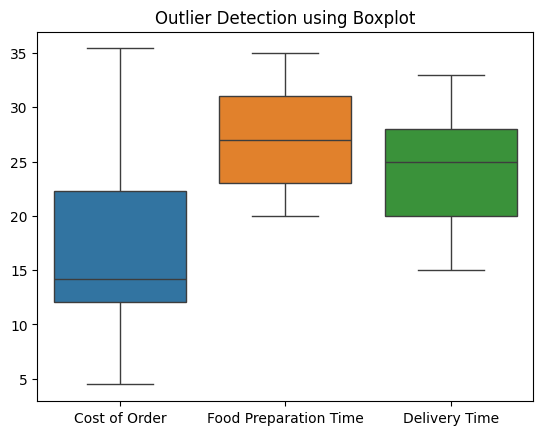

In [39]:
df_numeric = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']]
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = (df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))

outliers = outliers_iqr.any(axis=1)
print(f"Number of outliers detected using IQR method: {outliers.sum()}")

cost = df['cost_of_the_order']
food_prep_time = df['food_preparation_time']
delivery_time = df['delivery_time']
sns.boxplot(data=pd.DataFrame({
    'Cost of Order': cost,
    'Food Preparation Time': food_prep_time,
    'Delivery Time': delivery_time
}))
plt.title('Outlier Detection using Boxplot')
plt.show()

#####  Change rating column to type int16 and use NaN for 'not given' rating.


In [40]:
df['rating'] = df['rating'].replace('Not given', np.nan)  # Replace 'Not given' with NaN
df['rating'] = df['rating'].astype('float').astype('Int16')  # Convert rating to nullable integer type
print('Rating values after conversion:')
df['rating'].value_counts(dropna=False) # Display counts of ratings including NaN values

Rating values after conversion:


rating
<NA>    736
5       588
4       386
3       188
Name: count, dtype: Int64

##### Add an order_total_time column

In [41]:
df['order_total_time'] = df['food_preparation_time'] + df['delivery_time']
df[['order_id', 'order_total_time']].sample(10)  # Display a random sample of 10 rows from the new column


,order_id,order_total_time
602,1476815,49
1291,1477351,50
1370,1478329,54
77,1477938,49
228,1477247,48
1576,1477086,64
995,1477005,37
1701,1477228,47
1006,1477395,62
1891,1476981,50


##### Add a food_preparation_time_mean column to help the restaurant improve food preparation times

In [42]:
df['food_preparation_time_mean'] = df.groupby('restaurant_name')['food_preparation_time'].transform('mean')
df[['restaurant_name', 'food_preparation_time', 'food_preparation_time_mean']].sample(10)  # Display a random sample of 10 rows with the new column


,restaurant_name,food_preparation_time,food_preparation_time_mean
966,Pinto Nouveau Thai Bistro,29,26.750000
937,Sushi of Gari 46,32,27.540541
1393,Blue Ribbon Fried Chicken,21,27.197917
566,RedFarm Broadway,28,27.593220
533,The Meatball Shop,21,27.181818
530,Shake Shack,26,27.945205
553,Blue Ribbon Sushi,33,27.924370
343,Cafe Mogador,32,25.277778
1449,Kori Restaurant and Bar,26,26.000000
357,Blue Ribbon Sushi,20,27.924370


In [43]:
df[df['restaurant_name'] == 'Sushi of Gari 46'][['restaurant_name', 'food_preparation_time', 'food_preparation_time_mean']].head() # Display rows for a specific restaurant to check the food preparation time against the mean

,restaurant_name,food_preparation_time,food_preparation_time_mean
29,Sushi of Gari 46,20,27.540541
56,Sushi of Gari 46,24,27.540541
159,Sushi of Gari 46,31,27.540541
226,Sushi of Gari 46,35,27.540541
237,Sushi of Gari 46,24,27.540541


##### Based on the new added column 'food_preparation_time_mean' create a column to check if food is late.

In [44]:
df['food_is_late'] = df['food_preparation_time'] > df['food_preparation_time_mean']
df[['restaurant_name', 'food_preparation_time', 'food_preparation_time_mean', 'food_is_late']].sample(10)  # Display a random sample of 10 rows with the new column

,restaurant_name,food_preparation_time,food_preparation_time_mean,food_is_late
1768,ilili Restaurant,26,26.388889,False
1370,Tres Carnes,21,27.000000,False
1564,Tamarind TriBeCa,30,26.962963,True
587,Chola Eclectic Indian Cuisine,30,30.000000,False
1216,Blue Ribbon Fried Chicken,29,27.197917,True
1747,Han Dynasty,35,27.413043,True
1421,J. G. Melon,22,28.466667,False
958,RedFarm Hudson,22,27.163636,False
1873,Shake Shack,35,27.945205,True
1527,Pinto Nouveau Thai Bistro,23,26.750000,False


##### Add a order_total_time_mean column

In [45]:
df['order_total_time_mean'] = df.groupby('restaurant_name')['order_total_time'].transform('mean')
df[['restaurant_name', 'order_total_time', 'order_total_time_mean']].sample(10)  # Display a random sample of 10 rows with the new column


,restaurant_name,order_total_time,order_total_time_mean
1400,Tres Carnes,53,54.000000
1085,RedFarm Hudson,52,51.363636
583,ilili Restaurant,58,51.277778
1270,Galli Restaurant,38,38.000000
1723,Parm,52,52.808824
1150,Westville Hudson,50,47.400000
23,Tortaria,49,47.750000
1779,ilili Restaurant,56,51.277778
1811,Blue Ribbon Fried Chicken,44,51.343750
599,TAO,43,49.938776


In [46]:
df[df['restaurant_name'] == 'Sushi of Gari 46'][['restaurant_name', 'order_total_time', 'order_total_time_mean']].head() # Display rows for a specific restaurant to check the total order time against the mean

,restaurant_name,order_total_time,order_total_time_mean
29,Sushi of Gari 46,49,53.513514
56,Sushi of Gari 46,48,53.513514
159,Sushi of Gari 46,64,53.513514
226,Sushi of Gari 46,58,53.513514
237,Sushi of Gari 46,44,53.513514


##### Based on column 'order_total_time' create a column to check if order is late

In [47]:
df['order_is_late'] = df['order_total_time'] > df['order_total_time_mean']
df[['restaurant_name', 'order_total_time', 'order_total_time_mean', 'order_is_late']].sample(10)  # Display a random sample of 10 rows with the new column

,restaurant_name,order_total_time,order_total_time_mean,order_is_late
1866,Xi'an Famous Foods,61,56.333333,True
407,Shake Shack,48,52.607306,False
684,Bareburger,61,51.962963,True
210,Momoya,57,52.433333,True
597,Blue Ribbon Sushi,61,51.865546,True
829,Dos Caminos,58,53.125000,True
1381,Nobu Next Door,49,52.333333,False
581,Five Guys Burgers and Fries,38,49.034483,False
411,The Meatball Shop,53,51.424242,True
1433,Shake Shack,45,52.607306,False


##### Create a column if the delivery was good or not based on the client rating (4-5 is good)

In [48]:
df['order_is_good'] = df['rating'].apply(lambda x: True if x >= 4 else False if pd.notna(x) else np.nan)  # Create a new column based on the rating
df[['restaurant_name', 'rating', 'order_is_good']].sample(10)  # Display a random sample of 10 rows with the new column

,restaurant_name,rating,order_is_good
26,The Meatball Shop,5,True
1348,Cafe Mogador,3,False
1222,Han Dynasty,5,True
797,Blue Ribbon Sushi,<NA>,NaN
1464,Chipotle Mexican Grill $1.99 Delivery,<NA>,NaN
1399,Shake Shack,<NA>,NaN
729,RedFarm Hudson,5,True
1480,Nobu Next Door,<NA>,NaN
1468,Empanada Mama (closed),5,True
1490,Tamarind TriBeCa,5,True


##### Based on the Q1 and Q3 percentile by cuisine type add a column if the cost_of_the_order is expensive, normal or cheap

In [57]:
# Calculate Q1, Q3, and IQR for each cuisine type
Q1 = df.groupby('cuisine_type')['cost_of_the_order'].quantile(0.25)
Q3 = df.groupby('cuisine_type')['cost_of_the_order'].quantile(0.75)
IQR = Q3 - Q1

# Merge quantiles and IQR back to the original dataframe
df['Q1'] = df['cuisine_type'].map(Q1)
df['Q3'] = df['cuisine_type'].map(Q3)
df['IQR'] = df['cuisine_type'].map(IQR)

# Calculate the lower and upper bounds for outliers based on IQR
df['outliers_lower_bound'] = df['Q1'] - 1.5 * df['IQR']
df['outliers_upper_bound'] = df['Q3'] + 1.5 * df['IQR']

# Categorize the cost_of_the_order based on Q1 and Q3 values
df['cost_category'] = df.apply(lambda row: 'Expensive' if row['cost_of_the_order'] > row['outliers_upper_bound'] else 'Normal' if row['cost_of_the_order'] > row['outliers_lower_bound'] else 'Cheap', axis=1)

# Drop the Q1, Q3, and IQR columns as they are no longer needed
df = df.drop(columns=['Q1', 'Q3', 'IQR', 'outliers_lower_bound', 'outliers_upper_bound'])

# View the result
df[['cuisine_type', 'cost_of_the_order', 'cost_category']].head()


,cuisine_type,cost_of_the_order,cost_category
0,Korean,30.75,Expensive
1,Japanese,12.08,Normal
2,Mexican,12.23,Normal
3,American,29.20,Normal
4,American,11.59,Normal


In [50]:
df[df['cuisine_type'] == 'American'][['cuisine_type', 'cost_of_the_order', 'cost_category']].head() # Display rows for a specific cuisine type to check the cost category

,cuisine_type,cost_of_the_order,cost_category
3,American,29.20,Normal
4,American,11.59,Normal
12,American,24.30,Normal
14,American,12.13,Normal
15,American,16.20,Normal


In [51]:
df['cost_category'].value_counts(dropna=False)  # Count the number of orders in each cost category

cost_category
Normal       1887
Expensive       8
Cheap           3
Name: count, dtype: int64

In [52]:
df[df['cost_category'] == 'Expensive'][['cuisine_type', 'cost_of_the_order', 'cost_category']] # Display rows for expensive orders based on cuisine type and cost


,cuisine_type,cost_of_the_order,cost_category
0,Korean,30.75,Expensive
524,Mediterranean,32.93,Expensive
573,Mediterranean,35.41,Expensive
653,Korean,29.25,Expensive
746,Vietnamese,22.26,Expensive
858,Mediterranean,29.05,Expensive
1132,Mediterranean,31.43,Expensive
1148,Mediterranean,31.38,Expensive


In [53]:
df[df['cost_category'] == 'Cheap'][['cuisine_type', 'cost_of_the_order', 'cost_category']] # Display rows for cheap orders based on cuisine type and cost

,cuisine_type,cost_of_the_order,cost_category
301,Korean,8.25,Cheap
464,Korean,6.74,Cheap
1550,Korean,5.77,Cheap


##### Customer-level features: e.g., number of orders per customer (loyalty), average spend.

In [54]:
customer_number_of_orders = df.groupby('customer_id')['order_id'].transform('count')  # Count the number of orders for each customer
df.drop(columns=['customer_number_of_orders'], inplace=True, errors='ignore')  # Drop the column if it already exists to avoid duplication
df.insert(value=customer_number_of_orders, column='customer_number_of_orders', loc=2)  # Insert the new column at index 2
df[['order_id', 'customer_id', 'customer_number_of_orders']].sample(10)  # Display a random sample of 10 rows with the new column

,order_id,customer_id,customer_number_of_orders
1794,1476976,300552,1
1334,1477979,201438,1
1885,1477550,97324,1
266,1477286,110091,2
1637,1477965,384411,1
54,1477760,130507,1
475,1476738,233614,1
1472,1477331,384390,1
1561,1478185,97079,6
142,1477177,42385,1


In [59]:
customer_avg_cost = df.groupby('customer_id')['cost_of_the_order'].transform('mean')  # Calculate the average spend for each customer
df.drop(columns=['customer_avg_spend'], inplace=True, errors='ignore')  # Drop the column if it exists to avoid duplication
df.insert(value=customer_avg_cost, column='customer_avg_spend', loc=3)
df[['customer_id', 'customer_number_of_orders', 'customer_avg_spend']].sample(10)  # Display a random sample of 10 rows with the new column

,customer_id,customer_number_of_orders,customer_avg_spend
658,113972,4,14.587500
1497,214028,2,25.950000
1220,302923,1,20.520000
166,60052,6,17.040000
1856,222734,3,18.400000
720,61181,3,15.633333
1110,52832,13,17.369231
1321,209418,2,9.535000
1616,385134,2,24.035000
1810,344079,2,18.215000
